# Data Science - Laboratorio 1 - Series de tiempo
## Dataset: Monthly Mean Temperature

Sofia Velasquez 22049

José Marchena 22398

### 0. Obtencion de datos

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
mean_temp = pd.read_csv(
    './data/monthly-mean-temp.csv', 
    parse_dates=['Month'], 
    index_col='Month',
    date_parser=dateparse
)

division = int(len(mean_temp)*0.7)
train_mean_temp = mean_temp[:division]
test_mean_temp = mean_temp[division:]

print(mean_temp.shape)
print(train_mean_temp.shape)
print(test_mean_temp.shape)


(240, 1)
(168, 1)
(72, 1)


C:\Users\JM\AppData\Local\Temp\ipykernel_17032\4178901939.py:7: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  mean_temp = pd.read_csv(


In [2]:
%load_ext autoreload
%autoreload 2
import scripts

Importing plotly failed. Interactive plots will not work.


### 1. Analisis Exploratorio

Description
       Temperature
count   240.000000
mean     49.041250
std       8.569705
min      31.300000
25%      41.550000
50%      47.350000
75%      57.000000
max      66.500000
Time Series


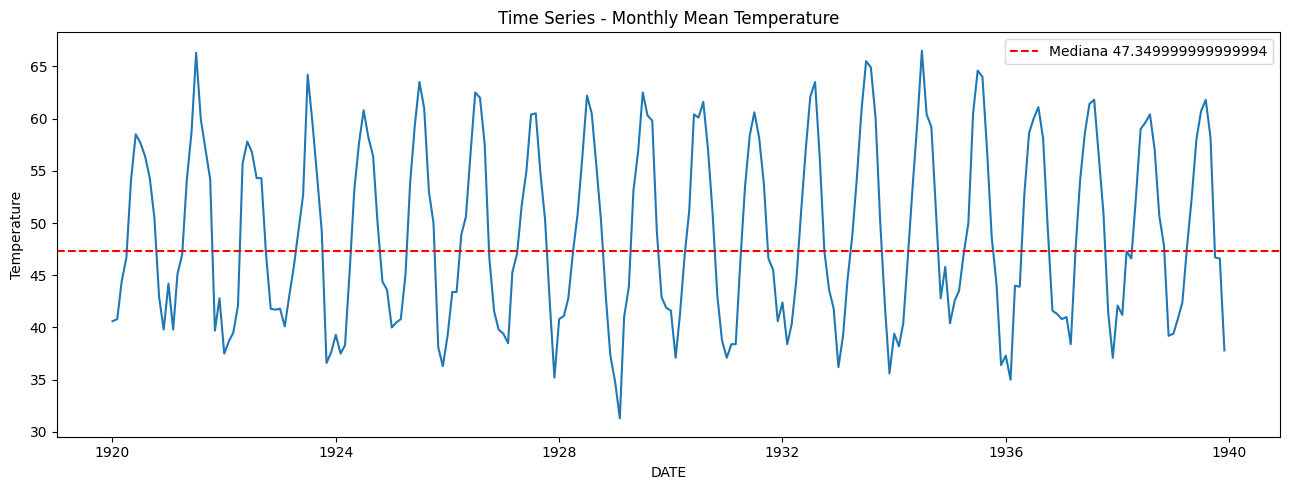

Seasonal Decompose
Resultados del Test de Dickey Fuller
Estadístico de prueba         -3.255492
p-value                        0.016989
# de retardos usados          14.000000
# de observaciones usadas    225.000000
Critical Value (1%)           -3.459752
Critical Value (5%)           -2.874473
Critical Value (10%)          -2.573663
dtype: float64
Se rechaza Hipotesis Nula => data es estacionaria en media
ACF plot


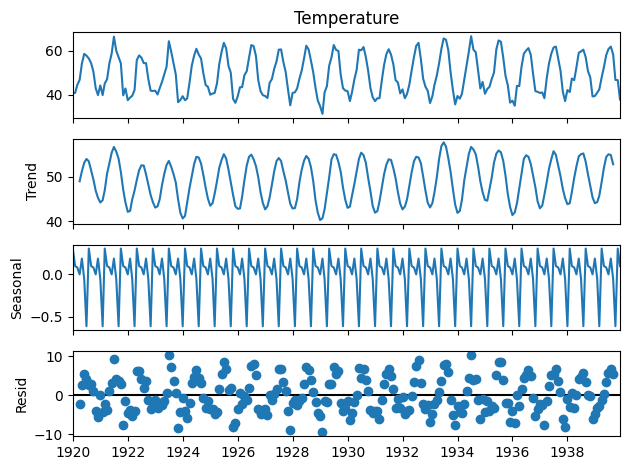

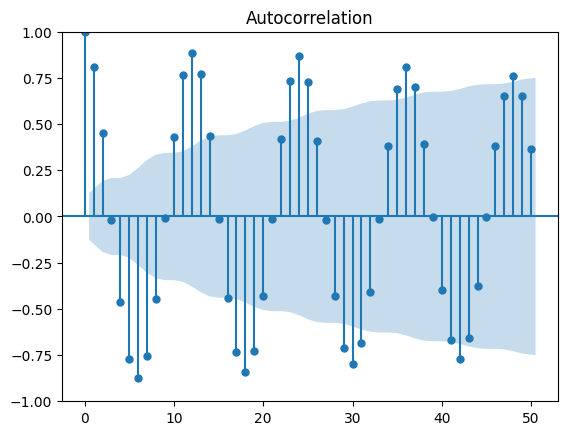

In [3]:
value = "Temperature"
title = "Monthly Mean Temperature"

scripts.exploratory_analysis(
    mean_temp,
    value,
    title
)

### 2. Moving Average

Finding Best Periodsss
Best Lag is 10 with weight of 0.8841860709388742


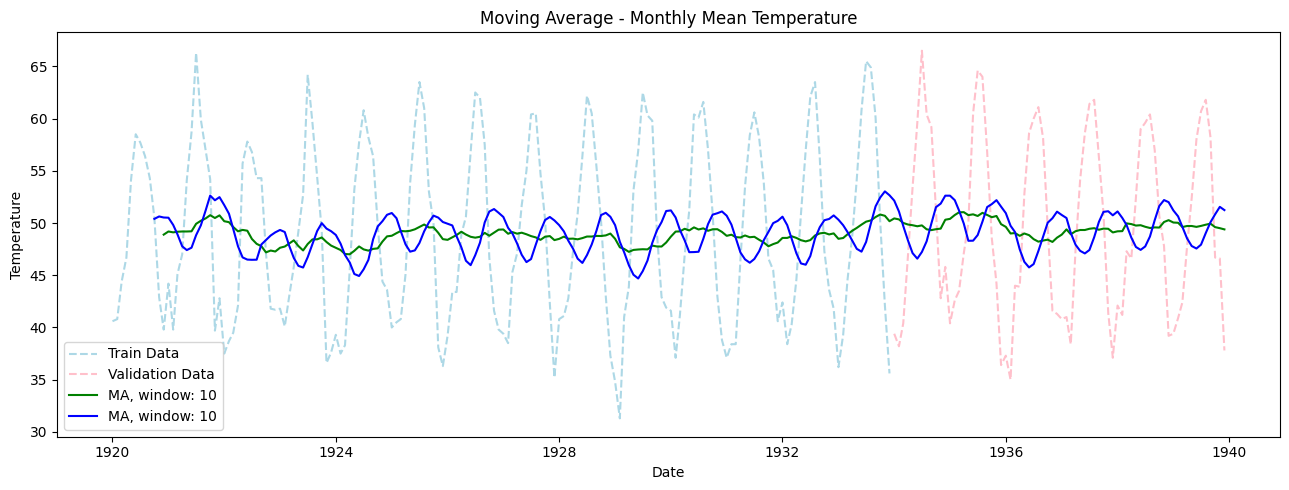

In [12]:
scripts.moving_average(mean_temp, test_mean_temp, train_mean_temp, value, title, 12)

In [13]:
## Error metrics con mejor periodo = 10
y_pred = test_mean_temp.rolling(window=12).mean()
scripts.print_error_metrics(y_pred[11:], test_mean_temp[11:], "MA - "+title)

Error Metrics - MA - Monthly Mean Temperature
MAE  (Mean Absolute Error):      7.5124
MSE  (Mean Squared Error):       70.9914
RMSE (Root Mean Squared Error):  8.4256
R²   (R-squared):                0.0020


#### 3. Simple Exponential Smoothing

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


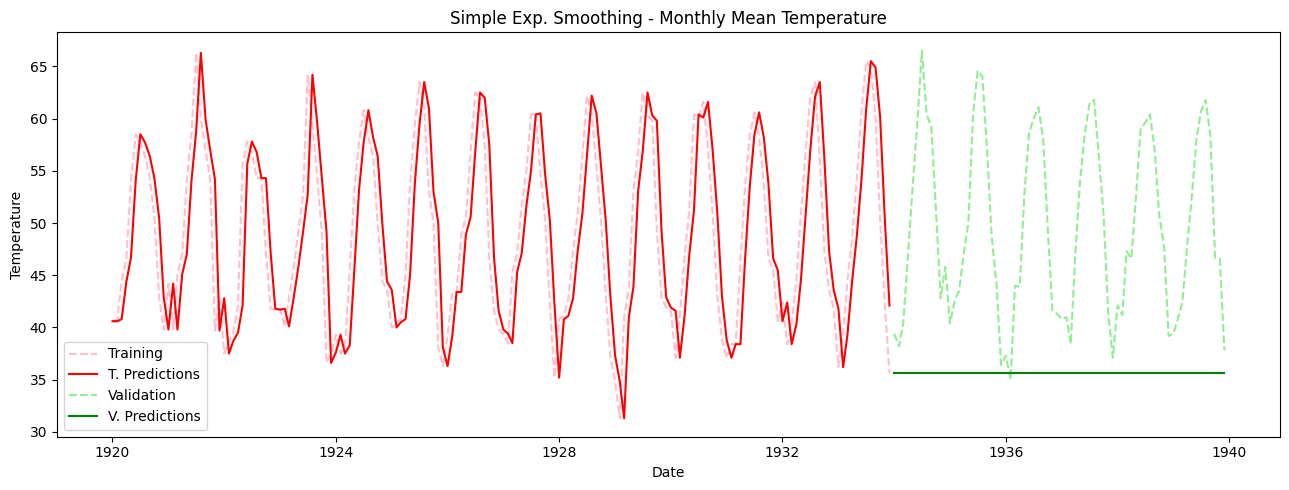

Error Metrics - SES - Monthly Mean Temperature
MAE  (Mean Absolute Error):      14.0125
MSE  (Mean Squared Error):       269.8474
RMSE (Root Mean Squared Error):  16.4270
R²   (R-squared):                -2.6484


In [14]:
scripts.ses_graph(train_mean_temp, test_mean_temp, value, title)

#### 4. Holt Winters

##### 4. Lineal

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


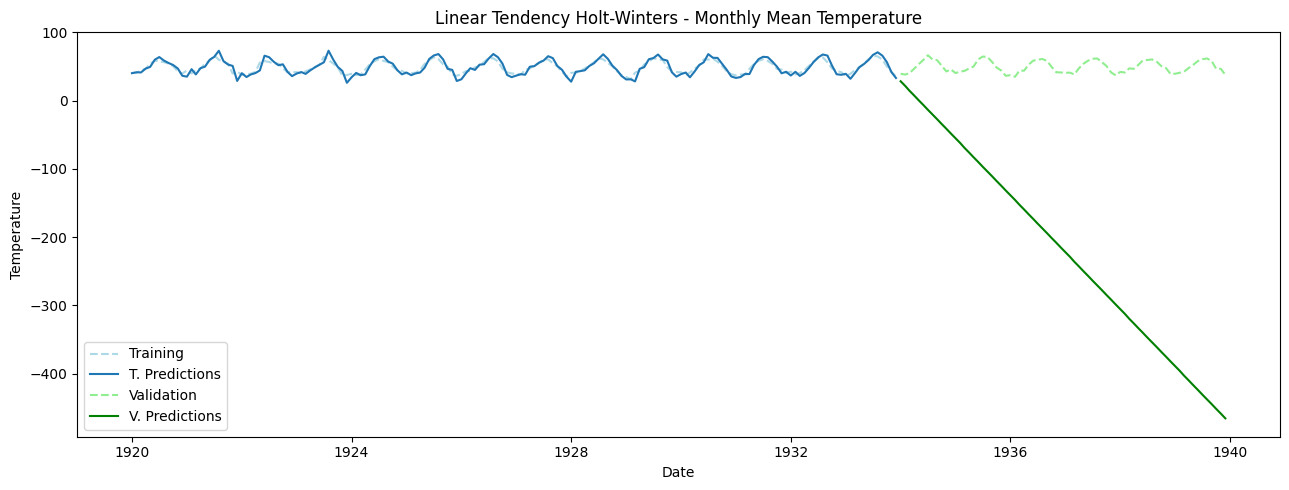

Error Metrics - Lineal HW - Monthly Mean Temperature
MAE  (Mean Absolute Error):      268.2549
MSE  (Mean Squared Error):       93005.7943
RMSE (Root Mean Squared Error):  304.9685
R²   (R-squared):                -1256.4466


In [16]:
scripts.lineal_hw(train_mean_temp, test_mean_temp, value, title)

#### 4.2 Seasonal

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


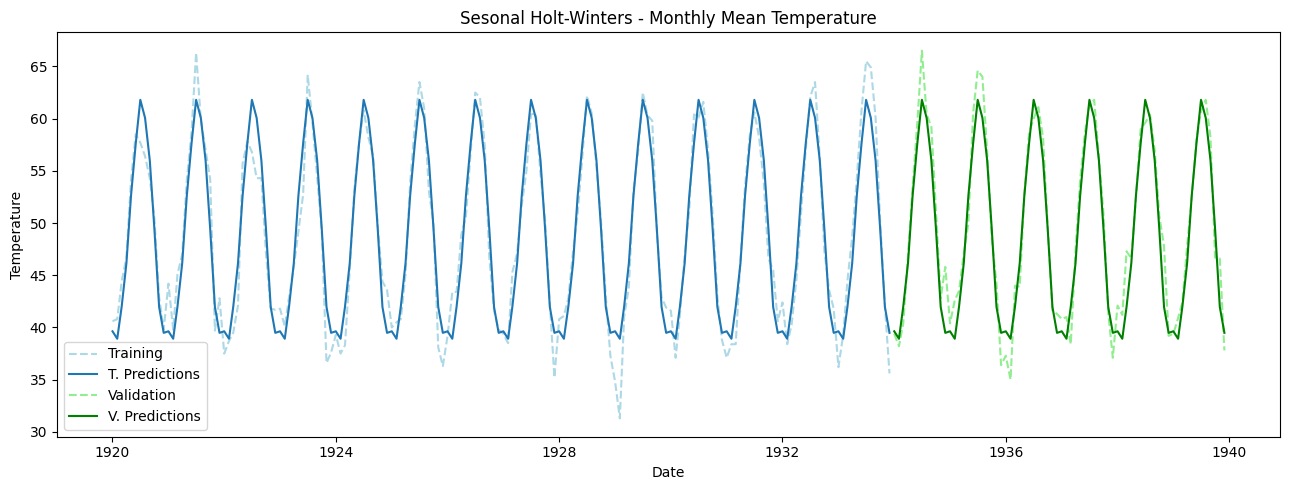

Error Metrics - Seasonal HW - Monthly Mean Temperature
MAE  (Mean Absolute Error):      1.7728
MSE  (Mean Squared Error):       5.0729
RMSE (Root Mean Squared Error):  2.2523
R²   (R-squared):                0.9314


In [18]:
scripts.seasonal_hw(train_mean_temp, test_mean_temp, value, title, 12)

### 5. Modelo SARIMA 

C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


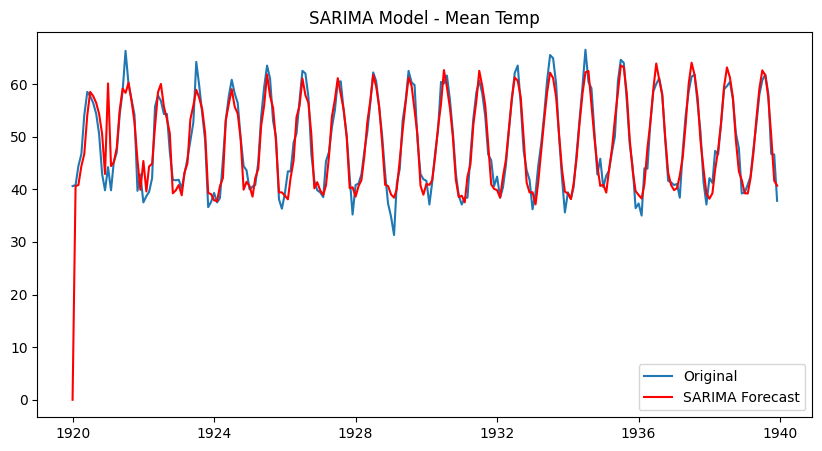

Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                        Temperature   No. Observations:                  240
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -519.766
Date:                            Fri, 18 Jul 2025   AIC                           1049.532
Time:                                    17:11:26   BIC                           1066.657
Sample:                                01-01-1920   HQIC                          1056.442
                                     - 12-01-1939                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2595      0.070      3.733      0.000       0.123       0.396
ma.L1         -0.974

In [31]:
from scripts import sarima_model

# Aplicar el modelo SARIMA
sarima_model(mean_temp.copy(), 'Month', 'Temperature', order=(1,1,1), seasonal_order=(1,1,1,12), title="Mean Temp")


*Parámetros: (1,1,1)(1,1,1,12)*

- Usé m=12 porque son temperaturas mensuales y tienen un ciclo anual.


### 6. Modelar serie de tiempo con Prophet

In [35]:
# !pip install plotly
# !pip install prophet

17:27:07 - cmdstanpy - INFO - Chain [1] start processing
17:27:08 - cmdstanpy - INFO - Chain [1] done processing


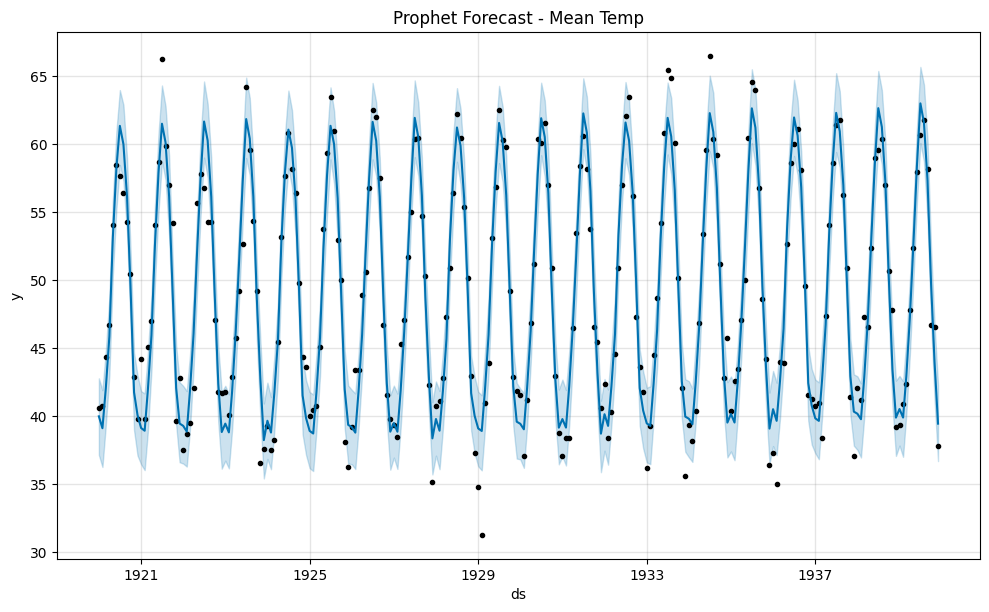

Mean Temp - Prophet MSE: 4.78, MAE: 1.70


In [34]:
from scripts import apply_prophet

# Aplicar Prophet
apply_prophet(mean_temp.copy(), 'Month', 'Temperature', title="Mean Temp")

### Comparación de modelos Sarima y Prophet

In [38]:
from scripts import compare_models

# Comparar modelos SARIMA y Prophet
results = []
results.append(compare_models(mean_temp, 'Month', 'Temperature', (1,1,1), (1,1,1,12), "Mean Temp"))

# Convertir resultados en DataFrame
comparison_df = pd.DataFrame(results)
print("\n Comparación de Modelos:\n")
print(comparison_df)

C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
17:48:28 - cmdstanpy - INFO - Chain [1] start processing
17:48:28 - cmdstanpy - INFO - Chain [1] done processing



 Comparación de Modelos:

     Dataset  SARIMA_RMSE  SARIMA_MAE  Prophet_RMSE  Prophet_MAE Best_Model
0  Mean Temp         3.78        2.21          2.19          1.7    Prophet
